In [3]:
%pylab inline
import numpy as numpy
#import modin.pandas as pd
import pandas as pd
import seaborn as sns
import neptune.new as neptune
from sklearn.model_selection import train_test_split
import qgrid
import os
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [4]:
!ls data

test_data.csv  train_data.csv  train_labels.csv


In [5]:
run = neptune.init(project='ikarpicka/ProjectML',
                   api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI0NDBkZGQxZC1iZDE0LTQwZjAtYTlhYS1jMzgxYWM4ZWYwMGYifQ==')

psutil is not installed. Hardware metrics will not be collected.
https://app.neptune.ai/ikarpicka/ProjectML/e/PROJ-32


In [6]:
df_train = pd.read_csv(os.path.join('data', 'train_data.csv'), header=None)
df_test = pd.read_csv(os.path.join('data', 'test_data.csv'), header=None)
df_train_labels = pd.read_csv(os.path.join('data', 'train_labels.csv'), header=None)

In [7]:
#pd.set_option('display.max_columns', None)

In [8]:
print(df_train.shape, df_test.shape, df_train_labels.shape)

(3750, 10000) (1250, 10000) (3750, 1)


df_train

In [9]:
df_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3144,163.945,287.877,89872.143,-34842.980,26545.949,-1542.737,232.240,1239.678,577.605,191.810,...,-15.538,-180.403,156.083,-301.337,-203.496,-460.272,443.787,502.846,46.453,-284.621
1780,131.502,-353.492,-13783.998,-23297.785,30185.026,-681.104,689.009,157.139,-11.625,-297.622,...,114.197,-325.403,176.099,138.152,-758.690,-760.476,74.430,1541.619,579.459,-410.339
961,311.191,198.574,24949.318,-74141.171,16239.586,299.424,1094.340,380.246,-226.080,33.106,...,174.024,746.324,-282.759,443.138,535.249,100.447,306.185,688.092,-532.176,-743.822
2823,-120.323,-291.556,3973.477,31834.136,-14985.073,1224.734,-2407.641,121.184,33.668,-101.455,...,95.495,272.266,-162.724,130.974,686.569,-705.025,-70.460,-543.720,625.249,68.045
1672,-255.040,-310.194,20203.078,-84225.708,3685.695,362.647,-84.751,813.454,-410.964,23.094,...,111.047,1017.847,149.119,258.612,-72.429,-369.465,-224.856,-992.532,-43.021,1196.095


In [10]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,...,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,...,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.781750,-135.343500,-29284.119500,-38028.429000,-14426.799500,-448.696750,-590.170250,-562.956500,-349.689750,-144.157750,...,-169.777250,-352.959500,-154.639750,-328.083750,-550.599000,-432.000750,-129.076250,-561.304000,-424.192750,-462.828000
50%,35.478500,2.680500,1181.698500,980.588000,-154.835000,13.931500,13.674000,16.750500,9.731000,11.159500,...,18.700000,38.348500,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780500,156.095750,29630.914500,40561.960250,14515.833000,506.893250,630.490750,608.698000,383.110500,179.768250,...,196.049000,396.868500,198.237250,356.185500,574.453250,425.338000,149.855750,539.550000,427.794500,552.173500
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [11]:
df_train.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0.01,-623.20929,-490.92517,-100158.64224,-129347.05008,-52191.05776,-1574.59148,-2003.85577,-1970.94667,-1198.11057,-533.06197,...,-630.03945,-1250.87874,-604.35879,-1154.21806,-1792.58412,-1553.43497,-471.95681,-1766.06269,-1413.92194,-1766.43255
0.25,-163.78175,-135.34350,-29284.11950,-38028.42900,-14426.79950,-448.69675,-590.17025,-562.95650,-349.68975,-144.15775,...,-169.77725,-352.95950,-154.63975,-328.08375,-550.59900,-432.00075,-129.07625,-561.30400,-424.19275,-462.82800
0.50,35.47850,2.68050,1181.69850,980.58800,-154.83500,13.93150,13.67400,16.75050,9.73100,11.15950,...,18.70000,38.34850,26.19950,14.57550,1.36350,-3.79650,8.60050,-4.24300,-7.62800,28.10700
0.75,215.78050,156.09575,29630.91450,40561.96025,14515.83300,506.89325,630.49075,608.69800,383.11050,179.76825,...,196.04900,396.86850,198.23725,356.18550,574.45325,425.33800,149.85575,539.55000,427.79450,552.17350
0.99,708.01659,494.80515,103871.64502,132816.82221,51609.80433,1706.45871,2119.21102,2006.27674,1223.18649,561.29211,...,638.02937,1267.47739,631.32286,1191.95385,1885.54150,1591.82639,473.63691,1931.72142,1452.60934,1800.38792


In [12]:
def check_missing():
    for column in df_train.columns:
        missing = column, df_train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

print(check_missing())

None


In [13]:
q1 = df_train.quantile(0.25) 
q3 =df_train.quantile(0.75) 
iqr = q3 - q1
print(iqr)

0         379.56225
1         291.43925
2       58915.03400
3       78590.38925
4       28942.63250
           ...     
9995      857.33875
9996      278.93200
9997     1100.85400
9998      851.98725
9999     1015.00150
Length: 10000, dtype: float64


In [14]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df_train[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df_train[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                               'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

print(outliers_15iqr)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -733.125125      785.123875                 14                 14
1        -572.502375      593.254625                 11                 12
2     -117656.670500   118003.465500                 15                 14
3     -155914.012875   158447.544125                  9                  9
4      -57840.748250    57929.781750                 14                 17
...              ...             ...                ...                ...
9995    -1718.008875     1711.346125                 16                 22
9996     -547.474250      568.253750                 13                  6
9997    -2212.585000     2190.831000                  8                 15
9998    -1702.173625     1705.775375                  8                 15
9999    -1985.330250     2074.675750                 16                 16

[10000 rows x 4 columns]


In [15]:
df_train.skew()
df_train.kurtosis().abs().sort_values()
df_train.agg(['kurtosis', 'skew']).T

,kurtosis,skew
0,0.010253,0.023915
1,-0.004958,0.036784
2,0.009133,-0.001958
3,-0.024319,-0.017559
4,0.119193,0.017595
...,...,...
9995,0.156313,0.037435
9996,-0.065115,-0.041411
9997,0.079554,0.078989
9998,-0.059513,0.040062


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

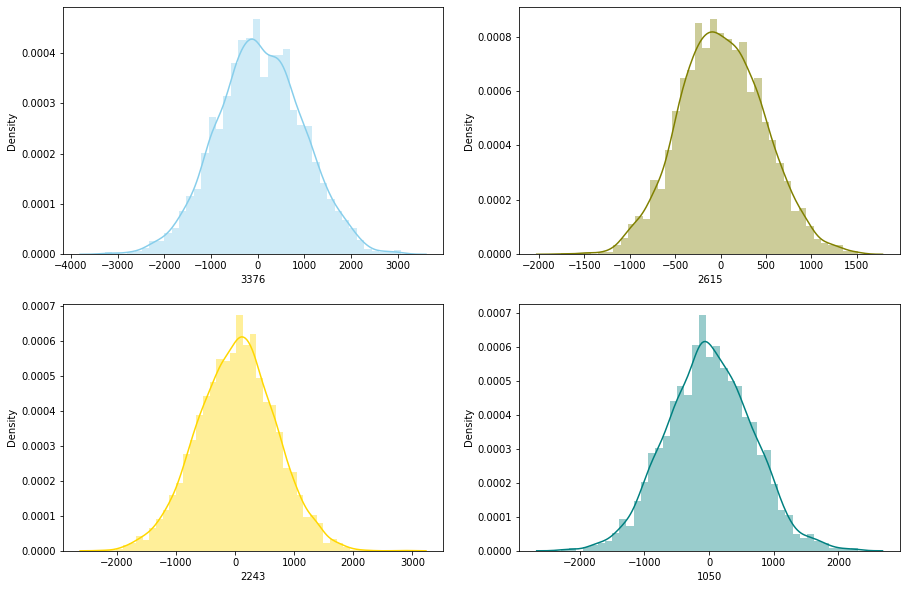

In [16]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df_train[random.randint(3750)], color='skyblue', ax=axes[0, 0])
sns.distplot(df_train[random.randint(3750)], color='olive', ax=axes[0, 1])
sns.distplot(df_train[random.randint(3750)], color='gold', ax=axes[1, 0])
sns.distplot(df_train[random.randint(3750)], color='teal', ax=axes[1, 1])
plt.show();

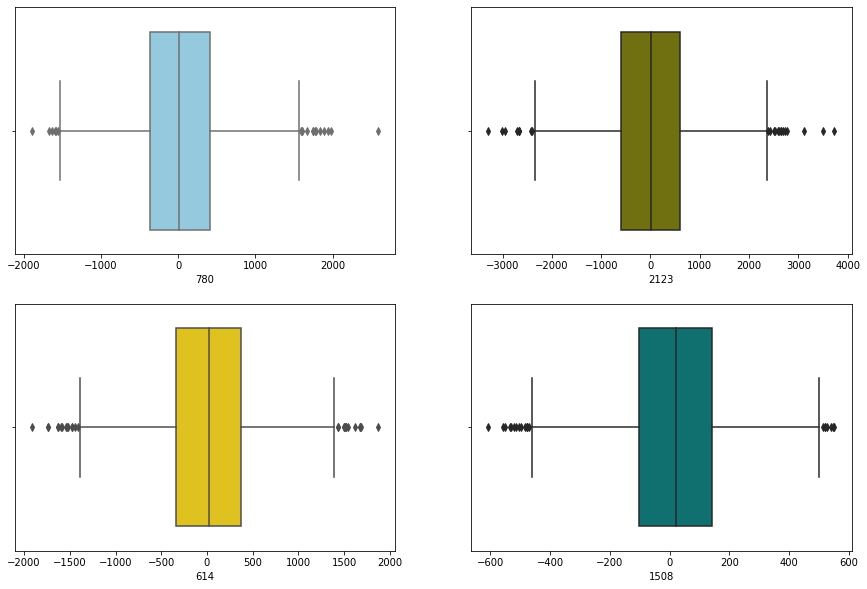

In [17]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df_train[random.randint(3750)], color='skyblue', ax=axes[0, 0])
sns.boxplot(x=df_train[random.randint(3750)], color='olive', ax=axes[0, 1])
sns.boxplot(x=df_train[random.randint(3750)], color='gold', ax=axes[1, 0])
sns.boxplot(x=df_train[random.randint(3750)], color='teal', ax=axes[1, 1])
plt.show();

In [18]:
feature = np.random.randint(3750)

alpha = 0.05
p_value = scipy.stats.normaltest(df_train[feature])[1]
if p_value < alpha:
    print('The null hypothesis was rejected for the variable {}. The variable does not come from the normal distribution. P-value: {}'.format(feature, p_value))
else:
    print('For the variable {} no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: {}'.format(feature, p_value))

The null hypothesis was rejected for the variable 3671. The variable does not come from the normal distribution. P-value: 0.027822789836505903


df_test

In [19]:
df_test.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
582,1.869,-25.940,-84887.300,-33562.915,-40048.756,98.870,-721.051,-854.045,-778.914,17.555,...,-267.189,-92.573,513.895,475.441,876.641,394.236,153.931,-1138.399,-220.320,1337.758
527,85.582,-393.569,17960.937,9109.094,-15915.598,-418.875,-105.821,922.167,125.862,289.105,...,620.925,-839.745,188.951,82.641,-490.030,405.746,-81.613,-585.779,80.072,-781.577
565,229.472,355.037,-32782.250,8912.852,-13985.416,-1456.159,577.191,-28.796,390.280,125.461,...,-43.390,43.414,219.633,-303.569,305.444,-181.913,217.823,-254.216,167.771,22.290
1186,-31.270,541.603,-16942.660,-24555.570,-9655.761,-439.444,906.681,798.329,-136.498,-82.268,...,97.175,1170.530,55.209,1108.753,-184.028,-362.389,132.146,1211.389,334.338,317.865
617,-64.190,-128.248,-50555.584,-7210.654,-23260.586,-121.702,-1203.907,-275.956,-238.090,26.494,...,315.636,531.595,388.895,630.943,-266.752,253.582,100.123,198.915,473.436,-101.696


In [20]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,6.892262,24.231871,691.035041,-923.186420,472.853216,-5.603389,-8.430038,18.087694,45.521371,5.532402,...,11.476222,33.046902,14.964225,1.617977,0.966285,27.937748,17.698405,-5.434074,2.335376,18.155565
std,279.865345,208.490530,43757.863316,57126.680674,21901.701715,713.053055,920.126198,878.797561,522.835391,228.835834,...,269.321713,545.254843,279.002383,484.089443,811.995519,668.026761,205.254268,795.507890,618.042044,777.694783
min,-1105.426000,-649.565000,-155113.836000,-184240.160000,-91291.593000,-2035.416000,-2908.191000,-2716.201000,-1637.602000,-841.328000,...,-754.360000,-2337.359000,-843.832000,-1660.371000,-3048.856000,-1897.451000,-656.654000,-2452.794000,-2080.857000,-2991.225000
25%,-176.906000,-116.729500,-27510.364750,-41059.084000,-13750.416000,-520.422750,-635.170750,-562.046500,-343.264000,-154.387000,...,-178.323000,-326.482750,-177.293750,-334.303250,-533.827500,-395.463000,-128.044750,-539.452750,-416.250500,-510.043500
50%,12.362000,20.508000,-444.999500,-397.729500,765.368500,-8.634000,38.824500,6.567500,42.814500,13.917000,...,12.929500,14.458000,18.659500,3.275500,-7.966500,26.660500,25.876000,11.653000,-1.106000,26.721500
75%,185.231250,171.514250,31295.237500,36278.893000,14594.061750,493.204250,625.198250,613.078500,406.646750,161.198250,...,199.985000,381.024250,205.077500,335.198500,573.268250,465.582000,157.331750,548.572500,424.111750,554.481750
max,1053.495000,736.906000,141244.534000,177561.749000,60844.690000,2397.488000,2987.201000,2916.440000,1765.077000,684.350000,...,1093.874000,2010.261000,914.288000,1647.605000,2444.526000,2412.412000,610.140000,2354.781000,1989.205000,2157.461000


In [21]:
df_test.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0.01,-674.88507,-450.58522,-106862.75381,-133078.89192,-52345.21522,-1491.10937,-2198.97393,-2023.70981,-1146.67588,-553.33006,...,-568.52008,-1326.01747,-625.02518,-1140.88678,-1836.62622,-1541.88099,-471.72772,-1794.33371,-1418.60502,-1812.47154
0.25,-176.90600,-116.72950,-27510.36475,-41059.08400,-13750.41600,-520.42275,-635.17075,-562.04650,-343.26400,-154.38700,...,-178.32300,-326.48275,-177.29375,-334.30325,-533.82750,-395.46300,-128.04475,-539.45275,-416.25050,-510.04350
0.50,12.36200,20.50800,-444.99950,-397.72950,765.36850,-8.63400,38.82450,6.56750,42.81450,13.91700,...,12.92950,14.45800,18.65950,3.27550,-7.96650,26.66050,25.87600,11.65300,-1.10600,26.72150
0.75,185.23125,171.51425,31295.23750,36278.89300,14594.06175,493.20425,625.19825,613.07850,406.64675,161.19825,...,199.98500,381.02425,205.07750,335.19850,573.26825,465.58200,157.33175,548.57250,424.11175,554.48175
0.99,672.11646,517.08747,102341.97171,135846.83683,49078.11381,1672.37043,2128.63323,1963.88959,1277.95576,533.54247,...,642.88076,1251.38600,631.48557,1121.99078,1872.03356,1601.98693,473.67052,1812.64619,1485.68037,1723.91295


In [22]:
def check_missing():
    for column in df_test.columns:
        missing = column, df_test[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

print(check_missing())

None


In [23]:
q1 = df_test.quantile(0.25) 
q3 = df_test.quantile(0.75) 
iqr = q3 - q1
print(iqr)

0         362.13725
1         288.24375
2       58805.60225
3       77337.97700
4       28344.47775
           ...     
9995      861.04500
9996      285.37650
9997     1088.02525
9998      840.36225
9999     1064.52525
Length: 10000, dtype: float64


In [24]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df_test[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df_test[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,
                               'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})

print(outliers_15iqr)

      lower_boundary  upper_boundary  num_of_outliers_L  num_of_outliers_U
0        -720.111875      728.437125                  9                  7
1        -549.095125      603.879875                  4                  2
2     -115718.768125   119503.640875                  9                  1
3     -157066.049500   152285.858500                  2                  8
4      -56267.132625    57110.778375                 10                  2
...              ...             ...                ...                ...
9995    -1687.030500     1757.149500                  4                  7
9996     -556.109500      585.396500                  5                  3
9997    -2171.490625     2180.610375                  6                  3
9998    -1676.793875     1684.655125                  2                  2
9999    -2106.831375     2151.269625                  6                  1

[10000 rows x 4 columns]


In [25]:
df_test.skew()
df_test.kurtosis().abs().sort_values()
df_test.agg(['kurtosis', 'skew']).T

,kurtosis,skew
0,0.424115,-0.038244
1,-0.018814,0.048131
2,0.153853,-0.097425
3,-0.043693,0.055751
4,0.448668,-0.205048
...,...,...
9995,0.059392,0.038944
9996,-0.122063,-0.117525
9997,-0.124856,-0.015890
9998,-0.064332,0.009265


/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

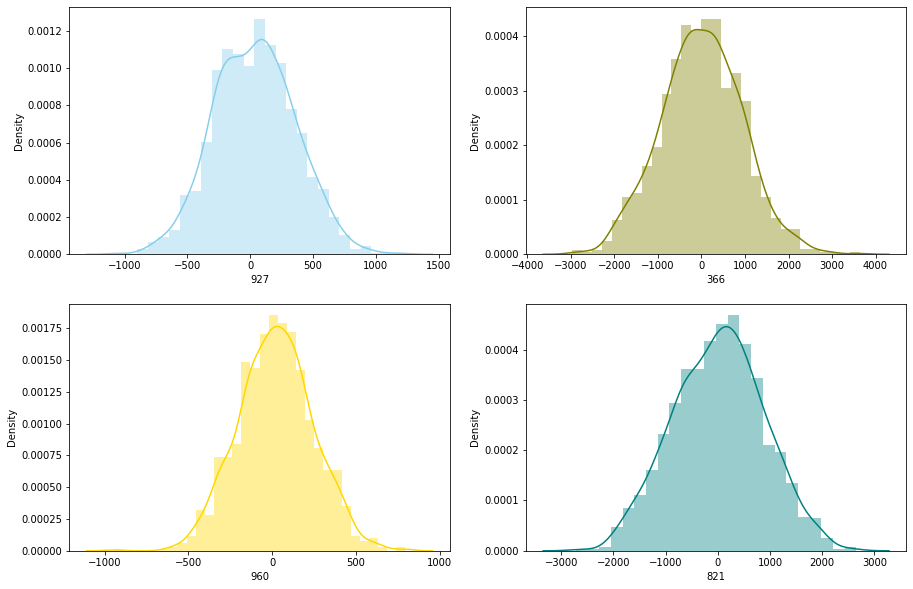

In [26]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df_test[random.randint(1250)], color='skyblue', ax=axes[0, 0])
sns.distplot(df_test[random.randint(1250)], color='olive', ax=axes[0, 1])
sns.distplot(df_test[random.randint(1250)], color='gold', ax=axes[1, 0])
sns.distplot(df_test[random.randint(1250)], color='teal', ax=axes[1, 1])
plt.show();

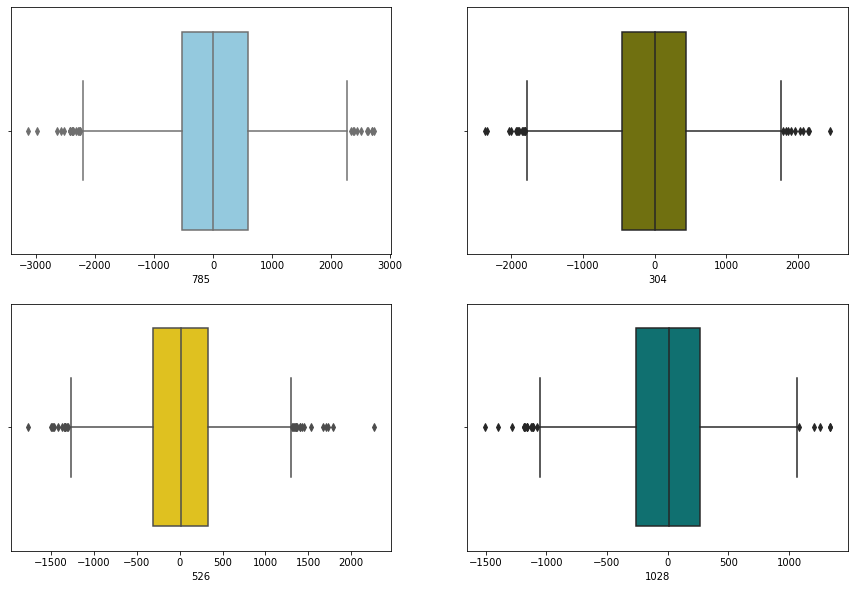

In [27]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df_train[random.randint(1250)], color='skyblue', ax=axes[0, 0])
sns.boxplot(x=df_train[random.randint(1250)], color='olive', ax=axes[0, 1])
sns.boxplot(x=df_train[random.randint(1250)], color='gold', ax=axes[1, 0])
sns.boxplot(x=df_train[random.randint(1250)], color='teal', ax=axes[1, 1])
plt.show();

In [28]:
feature = np.random.randint(1250)

alpha = 0.05
p_value = scipy.stats.normaltest(df_train[feature])[1]
if p_value < alpha:
    print('The null hypothesis was rejected for the variable {}. The variable does not come from the normal distribution. P-value: {}'.format(feature, p_value))
else:
    print('For the variable {} no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: {}'.format(feature, p_value))

For the variable 1185 no grounds for rejecting the null hypothesis were found. The variable come from the normal distribution. P-value: 0.861394589972909


df_train_labels

In [29]:
df_train_labels.sample(5) 

,0
2230,1
2248,1
1398,1
1606,1
703,1


In [30]:
def check_missing():
    for column in df_train.columns:
        missing = column, df_train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)

check_missing()

In [31]:
df_train_labels.value_counts()

 1    3375
-1     375
dtype: int64

train_test_split, pca

In [32]:
X = df_train
y = df_train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0, stratify = y)

In [33]:
pca = PCA(n_components = 2, whiten = True)

In [34]:
X_train_standarized = StandardScaler().fit_transform(X_train)
X_test_standarized = StandardScaler().fit_transform(X_test)

In [35]:
X_train_pca = pca.fit_transform(X_train_standarized)
X_test_pca = pca.fit_transform(X_test_standarized)

In [37]:
print('Original shape: {}'.format(str(X_train_standarized.shape)))
print('Reduced shape: {}'.format(str(X_train_pca.shape)))
print('Shape componets PCA: {}'.format(pca.components_.shape))

Original shape: (2812, 10000)
Reduced shape: (2812, 2)
Shape componets PCA: (2, 10000)


In [38]:
print('Componets PCA: \n{}'.format(pca.components_))

Componets PCA: 
[[ 0.01384689  0.00671562 -0.00947019 ... -0.00316275  0.01433022
  -0.00949051]
 [ 0.00136469  0.00401644  0.01474027 ...  0.007272    0.00535506
  -0.00408504]]


In [39]:
X_train_pca = pd.DataFrame(X_train_pca, columns = ['c1', 'c2'])
X_train_pca = X_train_pca.assign(labels=(y_train).values)
X_train_pca.sample(5)

,c1,c2,labels
2421,-0.914776,-1.066816,1
2800,1.171191,0.487655,1
2056,0.171674,0.345735,1
1287,-0.297679,1.544382,1
1806,-1.313028,-0.549728,1


In [40]:
X_train_pca[['c1', 'c2']].describe()

,c1,c2
count,2.812000e+03,2.812000e+03
mean,5.053647e-18,1.263412e-17
std,1.000000e+00,1.000000e+00
min,-3.708464e+00,-2.952136e+00
25%,-6.647984e-01,-6.912652e-01
50%,-1.608984e-02,2.074985e-03
75%,6.179478e-01,6.876922e-01
max,3.759916e+00,3.468861e+00


In [41]:
X_train_pca['labels'].sample(5)

854     1
1089    1
911     1
956     1
14      1
Name: labels, dtype: int64

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


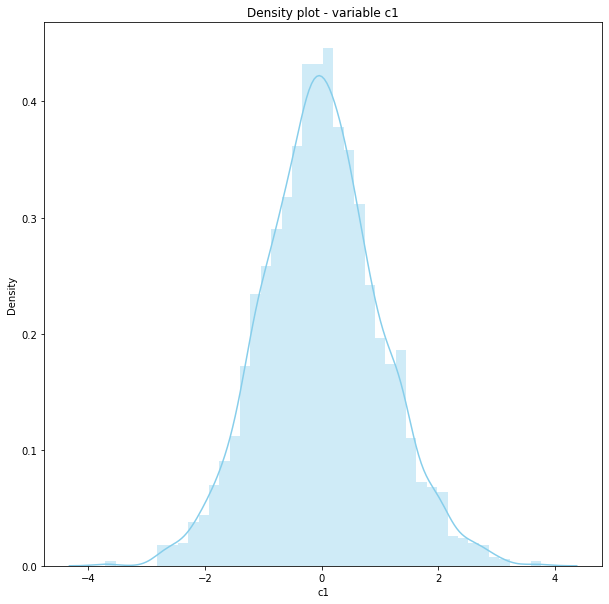

In [42]:
plt.figure(figsize=(10, 10))
sns.distplot(X_train_pca.c1, color = 'skyblue').set(title = 'Density plot - variable c1')
plt.show()

/home/iwona/anaconda3/envs/ProjectML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


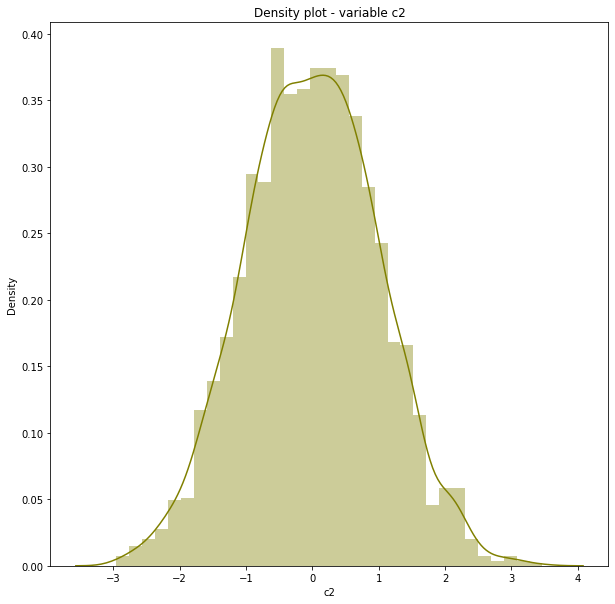

In [43]:
plt.figure(figsize=(10, 10))
sns.distplot(X_train_pca.c2, color = 'olive').set(title = 'Density plot - variable c2')
plt.show()

<AxesSubplot:xlabel='c1', ylabel='c2'>

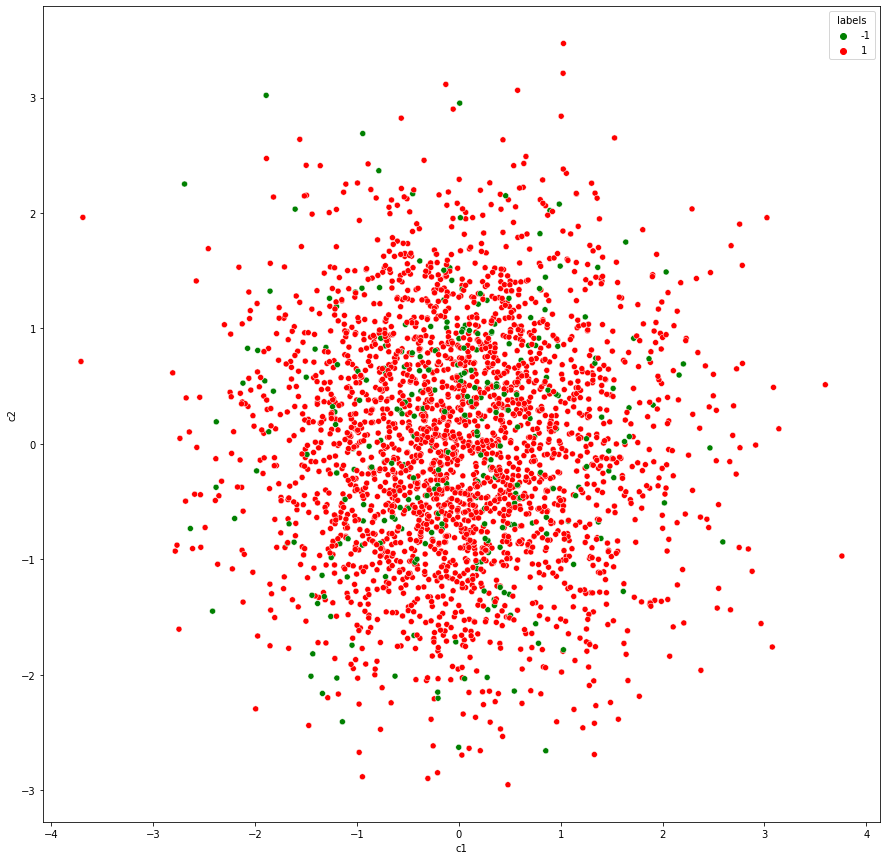

In [44]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data = X_train_pca, x = 'c1', y='c2', hue = X_train_pca['labels'], palette = ['green', 'red'])
